# TASK 1 : SMS CLASSIFIER

## Develop a text classification model to classify SMS as either spam or non-spam using data science techniques in Python.

## Given Task

In this task, Python is used to create a text classification model to create a SMS spam detection system. The objective is to create a classification model capable of identifying and classifying SMS as either ham(not spam) or spam. 
The standard data science steps are followed for this task, which includes data acquisition, preprocessing, feature extraction, model training, evaluation, and predictions.


Process :-

1: Reading and Understanding Data 

2: Visualizing and Data Cleaning

3: Tokenization and Tokens visualization

4: Data Preparation & Target encoding

5 : Feature Extraction

6: Model testing

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# Step 1- Reading and Understanding Data

### Importing libraries

In [1]:
# import required libraries for dataframe and visualization
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import nltk
from nltk.corpus import stopwords
from collections import Counter

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [25]:
# Download the stopwords dataset

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Praveen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# load data
df = pd.read_csv('D://DATA//Bharat Intern//task 1 - sms//spam.csv',  encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
# Drop unnecessary columns from the DataFrame

columns_to_drop = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
df.drop(columns=columns_to_drop, inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

In [5]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
# Finding the count of null values
df.isnull().sum()

v1    0
v2    0
dtype: int64

No null values in the dataset

In [7]:
# RENAMING THE COLUMNS 
df.columns = ['category', 'message']

df.head()

,category,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
#lets make another column i.e the length of the sms
len_msg=[]
for i in df['message']:
    len_msg.append(len(i))

In [9]:
df['msg_length']=len_msg
df.head()

,category,message,msg_length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# Step 2 : Visualizing and Data Cleaning

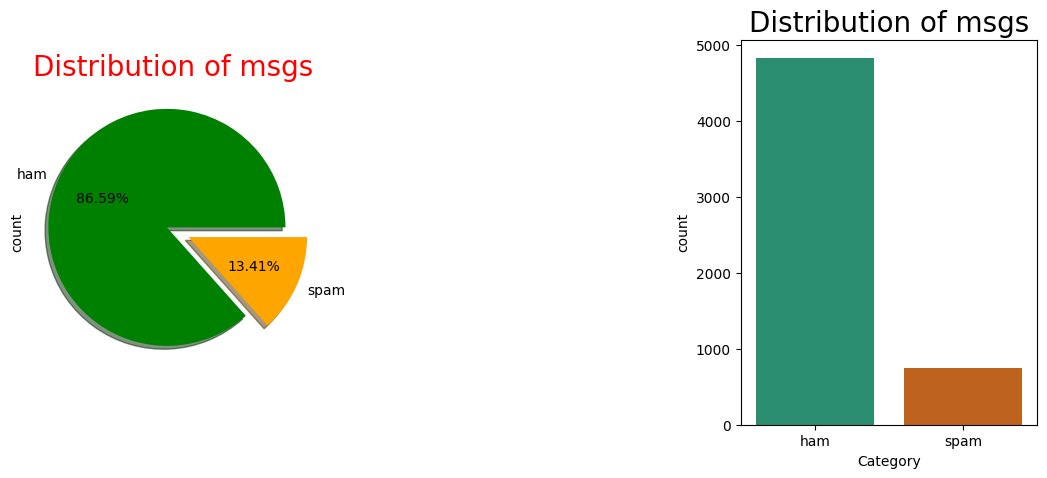

In [10]:

plt.figure(figsize=(13,5))

custom_colors = ['green', 'orange']
ax =plt.subplot(1,3,1)
ax= df['category'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%', colors = custom_colors, shadow=True);
ax.set_title(label = "Distribution of msgs ", fontsize = 20, color= 'Red');

ax = plt.subplot(1,3,3)
ax = sns.countplot(x='category', data=df, width=0.1)
plt.title("Distribution of msgs", fontsize=20)
sns.countplot(data=df, x='category', palette = "Dark2")
plt.xlabel('Category')
plt.show()

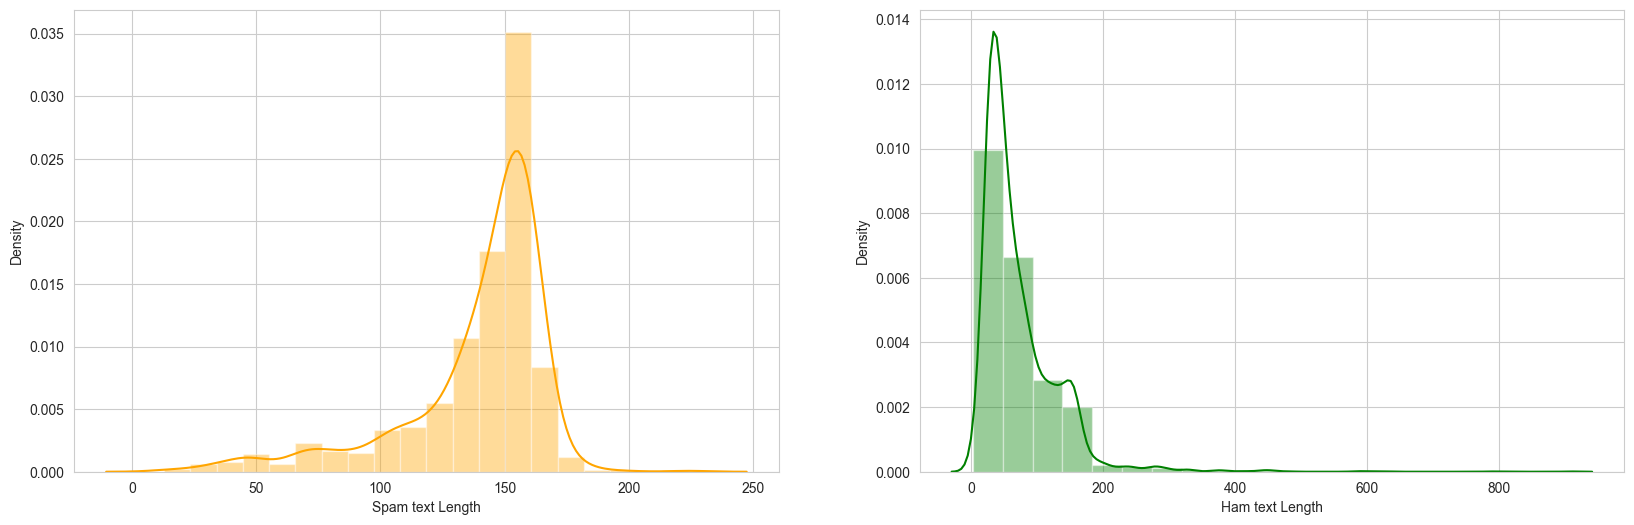

In [42]:
sns.set_style('whitegrid')

f, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.distplot(df[df['category']=='spam']['msg_length'], bins = 20, color = 'orange', ax = ax[0])
ax[0].set_xlabel("Spam text Length")

sns.distplot(df[df['category']=='ham']['msg_length'], bins = 20,color='green', ax = ax[1])
ax[1].set_xlabel("Ham text Length")



plt.show()

# Step 3: Tokenization and Tokens visualization

In [11]:
from wordcloud import WordCloud

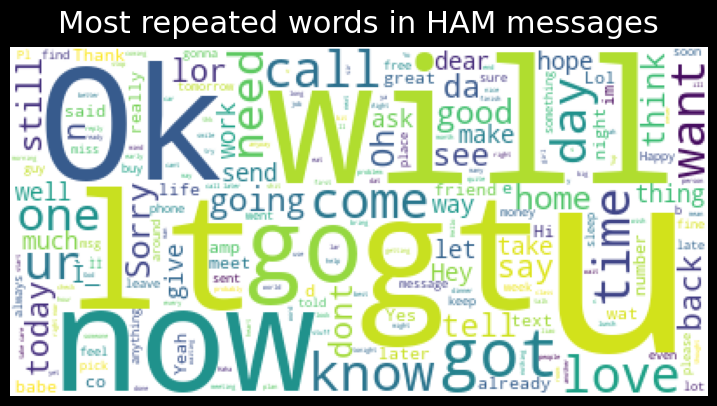

In [12]:
wc = WordCloud(background_color='white', max_words=200 )
wc.generate(' '.join(text for text in df.loc[df['category'] == 'ham', 'message']))
plt.figure(figsize=(9,5), facecolor='k')
plt.title('Most repeated words in HAM messages', color= 'white', fontdict={'size': 22, 'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

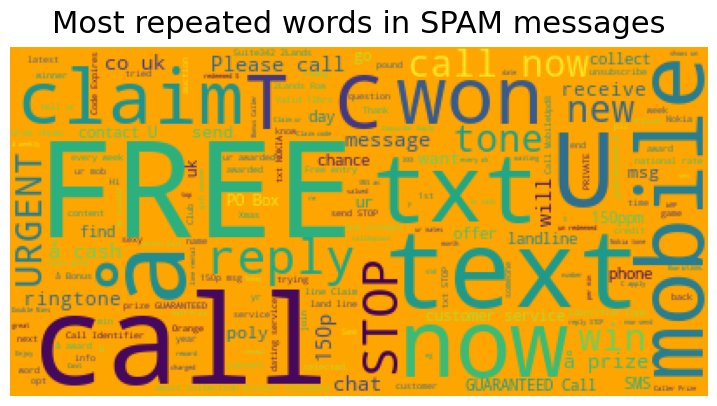

In [13]:
wc = WordCloud(background_color='orange', max_words=200)
wc.generate(' '.join(text for text in df.loc[df['category'] == 'spam', 'message']))
plt.figure(figsize=(9,5))
plt.title('Most repeated words in SPAM messages', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

# Step 4 : Data Preparation & Target encoding 

In [14]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['category'])

df['category_encoded'] = le.transform(df['category'])
df.head()

,category,message,msg_length,category_encoded
0,ham,"Go until jurong point, crazy.. Available only ...",111,0
1,ham,Ok lar... Joking wif u oni...,29,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
3,ham,U dun say so early hor... U c already then say...,49,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0


In [15]:
# Separate the feature (message) and target (category) data

X = df["message"]
Y = df["category_encoded"]

Splitting the data into training data & Test data

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [17]:
print(X.shape, X_train.shape, X_test.shape)

(5572,) (4457,) (1115,)


In [18]:
# Convert Y_train and Y_test to integer type
Y_train = Y_train.astype("int")
Y_test = Y_test.astype("int")

In [19]:
print(X_train)

1978    No I'm in the same boat. Still here at my moms...
3989    (Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3935       They r giving a second chance to rahul dengra.
4078       O i played smash bros  &lt;#&gt;  religiously.
4086    PRIVATE! Your 2003 Account Statement for 07973...
                              ...                        
3772    I came hostel. I m going to sleep. Plz call me...
5191                               Sorry, I'll call later
5226        Prabha..i'm soryda..realy..frm heart i'm sory
5390                           Nt joking seriously i told
860                   In work now. Going have in few min.
Name: message, Length: 4457, dtype: object


# Step 5: **Feature Extraction**

**TF-IDF Vectorizer**

Model Training : Logistic Regression

In [20]:
# Initialize TF-IDF Vectorizer
feature_extraction = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)

In [21]:
# Feature extraction for training and testing data
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [22]:
# training the Logistic Regression model with training data

model = LogisticRegression()
model.fit(X_train_features, Y_train)

LogisticRegression()

Accuracy Score

In [23]:
# accuracy on training data
X_train_prediction = model.predict(X_train_features)

In [31]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy*100, "%")

Accuracy score of training data : {:.4f} 96.94862014808166 %


In [26]:
# accuracy on test data
X_test_prediction = model.predict(X_test_features)

In [27]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : {:.4f}', test_data_accuracy*100, "%")

Accuracy score of test data :  95.24663677130046 %


In [32]:
# Calculate and print Root Mean Square Error(RMSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, X_test_prediction)
rmse = np.sqrt(mse)
print("RMSE value: {:.4f}".format(rmse))

RMSE value: 0.2180


In [33]:
 #Make predictions on the training data
predict_train_data=model.predict(X_train_features)

In [34]:
#Model Evaluation
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_train_data=accuracy_score(Y_train,predict_train_data)
print("Accuracy on training data: ",accuracy_train_data*100, "%")

Accuracy on training data:  96.94862014808166 %


In [35]:
# Make predictions on the testing data
predict_test_data=model.predict(X_test_features)

In [36]:
#Model Evaluation
accuracy_test_data=accuracy_score(Y_test,predict_test_data)
print("acuuracy on test data: ",accuracy_test_data*100, "%")

acuuracy on test data:  95.24663677130046 %


## Confusion Matrix

[[962   3]
 [ 50 100]]


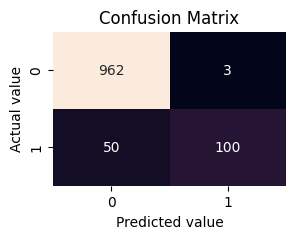

In [46]:
conf_matrix=confusion_matrix(Y_test,predict_test_data)

print(conf_matrix)

plt.figure(figsize=(3,2))
sns.heatmap(conf_matrix,annot=True,fmt="d",cbar=False)
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Confusion Matrix")
plt.show()

# Step 6 : Model testing

**Test the model with few randon messages**

In [37]:
new_msg=["Need to talk to you.. call me "]
new_data_features=feature_extraction.transform(new_msg)
prediction=model.predict(new_data_features)
print(prediction)


if(prediction[0]==1):
    print("SPAM Message")
else:
    print("HAM Message")

[0]
HAM Message


In [38]:

new_msg=["Free entry in 2 a wkly comp to win FA Cup fina"]
new_data_features=feature_extraction.transform(new_msg)
prediction=model.predict(new_data_features)
print(prediction)


if(prediction[0]==1):
    print("SPAM Message")
else:
    print("HAM Message")
    

[1]
SPAM Message


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)